In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from imaginglss import DECALS
decals = DECALS('/global/homes/y/yfeng1/m779/yfeng1/imaginglss/dr2.conf.py')

In [273]:
from imaginglss.utils import mpl_aea
reload(mpl_aea)

<module 'imaginglss.utils.mpl_aea' from '/global/project/projectdirs/m779/yfeng1/source/imaginglss/imaginglss/utils/mpl_aea.py'>

In [3]:
import h5py
import kdcount

In [97]:
from kdcount import sphere
from kdcount import correlate
reload(correlate)
reload(sphere)

<module 'kdcount.sphere' from '/global/homes/y/yfeng1/.local/lib/python2.7/site-packages/kdcount/sphere.pyc'>

In [176]:
CDR_LRG = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/CDR_LRG.hdf5', 'r')
CDR_LRGR = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/CDR_LRG-RANDOM.hdf5', 'r')

In [6]:
LRG = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/LRG.hdf5', 'r')
LRGR = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/LRG-RANDOM.hdf5', 'r')

In [120]:
ELG = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/ELG.hdf5', 'r')
ELGR = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/ELG-RANDOM.hdf5', 'r')

In [238]:
CDR_ELG = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/CDR_ELG.hdf5', 'r')
CDR_ELGR = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/CDR_ELG-RANDOM.hdf5', 'r')

In [128]:
QSO = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/QSO.hdf5', 'r')
QSOR = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/QSO-RANDOM.hdf5', 'r')

In [242]:
CDR_QSO = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/CDR_QSO.hdf5', 'r')
CDR_QSOR = h5py.File('/global/homes/y/yfeng1/source/imaginglss/nersc/CDR_QSO-RANDOM.hdf5', 'r')

In [200]:
from imaginglss.model.dataproduct import bands

In [201]:
print bands

{'Y': 5, 'W4': 9, 'r': 2, 'u': 0, 'W1': 6, 'g': 1, 'i': 3, 'W3': 8, 'z': 4, 'W2': 7}


In [184]:
def readdata(h5file, completeness, subsample):
    RA = h5file['RA'][:]
    DEC = h5file['DEC'][:]
    FC = h5file['COMPLETENESS'][:]
    v = h5file['TYCHO_VETO']['BOSS_DR9'][:]
    
    mask = ~v & (FC >= completeness)
#    if 'CONFIDENCE' in h5file:
#        CONFIDENCE = h5file['CONFIDENCE'][:]
#        mask &= CONFIDENCE[:, 1] > 5
#        mask &= CONFIDENCE[:, 2] > 5
#        mask &= CONFIDENCE[:, 4] > 3
    #print len(RA), mask.sum()
    return RA[mask][::subsample], DEC[mask][::subsample]

def acorr(data, random, completeness, subsample):
    data = readdata(data, completeness, subsample)
    random = readdata(random, completeness, subsample)
    
    data = sphere.points(data[0], data[1])
    random = sphere.points(random[0], random[1])
    abin = sphere.AngularBinning(logspace(-3, 0, 16, endpoint=True))
    print len(data), len(random)
    
    DD = correlate.paircount(data, data, abin, np=8)
    DR = correlate.paircount(data, random, abin, np=8)
    RR = correlate.paircount(random, random, abin, np=8)
    
    r =  1. * len(data) / len(random)
    return abin, 1.0 * DD.sum1, 1.0 * DR.sum1 * r, 1.0 * RR.sum1 * (r * r)

# Martin's simulation, copied from email

In [42]:
xi_LRGsim = numpy.fromstring(
""" 0.0059      1.3333128      1.3339293      0.0066935
    0.0082      0.7937082      0.7941341      0.0063048
    0.0114      0.5210123      0.5213102      0.0046585
    0.0159      0.3251247      0.3249088      0.0028975
    0.0222      0.1872699      0.1874814      0.0025432
    0.0309      0.1099219      0.1098727      0.0013177
    0.0430      0.0710673      0.0711660      0.0010544
    0.0599      0.0553864      0.0553852      0.0007638
    0.0834      0.0449320      0.0449386      0.0005066
    0.1162      0.0374823      0.0375749      0.0006080
    0.1618      0.0302715      0.0302595      0.0004080
    0.2253      0.0231022      0.0230803      0.0004153
    0.3138      0.0166624      0.0166872      0.0003718
    0.4370      0.0117605      0.0117686      0.0002519
    0.6085      0.0077813      0.0077688      0.0002083
    0.8474      0.0045778      0.0045572      0.0001926
""", sep=' ').reshape(-1, 4).T

In [122]:
xi_ELGsim = numpy.fromstring(
""" 0.0059      0.0618821      0.0619034      0.0010241
    0.0082      0.0255468      0.0256541      0.0010897
    0.0114      0.0194393      0.0194185      0.0004137
    0.0159      0.0168435      0.0168256      0.0005362
    0.0222      0.0170369      0.0170354      0.0003401
    0.0309      0.0178402      0.0178283      0.0002898
    0.0430      0.0169437      0.0169424      0.0001548
    0.0599      0.0146951      0.0146951      0.0001200
    0.0834      0.0118795      0.0118697      0.0000833
    0.1162      0.0093799      0.0093856      0.0000966
    0.1618      0.0069754      0.0069720      0.0000785
    0.2253      0.0049743      0.0049652      0.0000645
    0.3138      0.0034435      0.0034394      0.0000554
    0.4370      0.0021931      0.0021899      0.0000463
    0.6085      0.0012434      0.0012403      0.0000511
    0.8474      0.0006279      0.0006284      0.0000397
""", sep=' ').reshape(-1, 4).T

In [123]:
xi_QSOsim = numpy.fromstring(
""" 0.0059      0.0172651      0.0173093      0.0058842
    0.0082     -0.0000735      0.0005288      0.0084870
    0.0114      0.0090166      0.0097537      0.0057657
    0.0159      0.0123315      0.0121035      0.0037471
    0.0222      0.0119125      0.0122433      0.0033194
    0.0309      0.0095169      0.0093196      0.0022516
    0.0430      0.0102863      0.0105746      0.0015901
    0.0599      0.0099424      0.0098718      0.0009474
    0.0834      0.0074437      0.0074153      0.0008298
    0.1162      0.0055929      0.0057222      0.0007914
    0.1618      0.0043447      0.0043344      0.0003325
    0.2253      0.0028906      0.0028863      0.0002219
    0.3138      0.0018112      0.0018252      0.0002027
    0.4370      0.0012336      0.0012337      0.0001401
    0.6085      0.0004966      0.0004931      0.0001145
    0.8474      0.0002425      0.0002461      0.0000798
""", sep=' ').reshape(-1, 4).T

# Correlation functions from data

In [189]:
abin, CDR_LRG_DD, CDR_LRG_DR, CDR_LRG_RR = acorr(CDR_LRG, CDR_LRGR, 1.0, 1)

539217 2948485


In [229]:
abin, LRG_DD, LRG_DR, LRG_RR = acorr(LRG, LRGR, 1.0, 1)

671423 8474853


[]

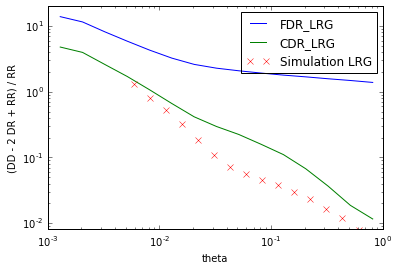

In [253]:
plot(abin.angular_centers, (LRG_DD - 2 * LRG_DR + LRG_RR) / LRG_RR, label='FDR_LRG')
plot(abin.angular_centers, (CDR_LRG_DD - 2 * CDR_LRG_DR + CDR_LRG_RR) / CDR_LRG_RR, label='CDR_LRG')
plot(xi_LRGsim[0], xi_LRGsim[1], 'x', label='Simulation LRG')
xlabel('theta')
ylabel('(DD - 2 DR + RR) / RR')
legend()
ylim(8e-3, 20)
loglog()

In [231]:
abin, ELG_DD, ELG_DR, ELG_RR = acorr(ELG, ELGR, 1.0, 1)

962788 738913


In [239]:
abin, CDR_ELG_DD, CDR_ELG_DR, CDR_ELG_RR = acorr(CDR_ELG, CDR_ELGR, 1.0, 1)

694838 1098701


[]

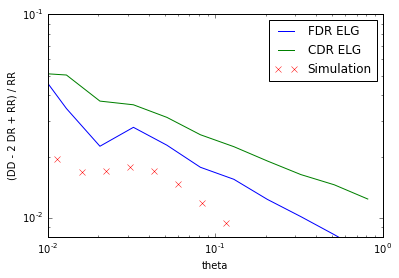

In [264]:
plot(abin.angular_centers, (ELG_DD - 2 * ELG_DR + ELG_RR) / ELG_RR, label='FDR ELG')
plot(abin.angular_centers, (CDR_ELG_DD - 2 * CDR_ELG_DR + CDR_ELG_RR) / CDR_ELG_RR, label='CDR ELG')
plot(xi_ELGsim[0], xi_ELGsim[1], 'x', label='Simulation')
xlabel('theta')
ylabel('(DD - 2 DR + RR) / RR')
legend()
xlim(1e-2, 1)
ylim(8e-3, 0.1)
loglog()

In [243]:
abin, CDR_QSO_DD, CDR_QSO_DR, CDR_QSO_RR = acorr(CDR_QSO, CDR_QSOR, 1.0, 1)

442971 854208


In [233]:
abin, QSO_DD, QSO_DR, QSO_RR = acorr(QSO, QSOR, 1.0, 1)

92268 393827


[]

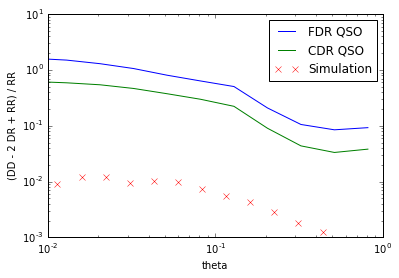

In [266]:
plot(abin.angular_centers, (QSO_DD - 2 * QSO_DR + QSO_RR) / QSO_RR, label='FDR QSO')
plot(abin.angular_centers, (CDR_QSO_DD - 2 * CDR_QSO_DR + CDR_QSO_RR) / CDR_QSO_RR, label='CDR QSO')
plot(xi_QSOsim[0], xi_QSOsim[1], 'x', label='Simulation')
xlabel('theta')
ylabel('(DD - 2 DR + RR) / RR')
xlim(1e-2, 1)
ylim(1e-3, 10)
legend()
loglog()

# Now look at the spatial distribution of randoms and objects
See if this can explain the weird correlation functions we see.

In [285]:
reload(mpl_aea)

<module 'imaginglss.utils.mpl_aea' from '/global/project/projectdirs/m779/yfeng1/source/imaginglss/imaginglss/utils/mpl_aea.py'>

In [304]:
def number_density(ax, cat):
    ra, dec = readdata(cat, 1.0, 1.0)
    #_ = hist2d(ra, dec, bins=(200, 200)
    ax.histmap(ra, dec, perarea=True)
    ax.set_xlim(100, 400)
    ax.set_ylim(-10, 45)
    ax.grid()

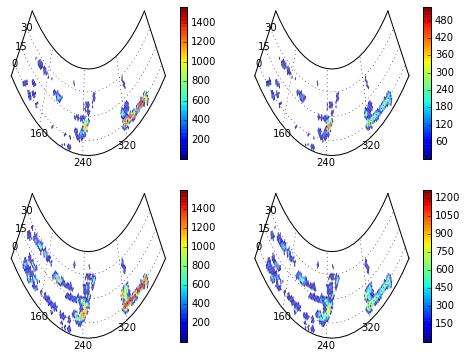

In [308]:
figure(figsize=(8, 6))
ax = subplot(221, projection='aea')
number_density(ax, QSOR)
colorbar()
ax = subplot(222, projection='aea')
number_density(ax, QSO)
colorbar()
ax = subplot(223, projection='aea')
number_density(ax, CDR_QSOR)
colorbar()
ax = subplot(224, projection='aea')
number_density(ax, CDR_QSO)
colorbar()

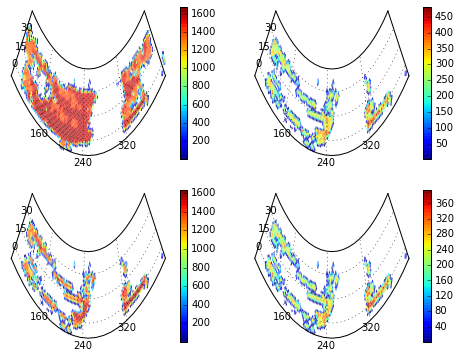

In [305]:
#LRG is screwed up big in FDR TS definition. Lack of R band lim.
figure(figsize=(8, 6))
ax = subplot(221, projection='aea')
number_density(ax, LRGR)
colorbar()
ax = subplot(222, projection='aea')
number_density(ax, LRG)
colorbar()
ax = subplot(223, projection='aea')
number_density(ax, CDR_LRGR)
colorbar()
ax = subplot(224, projection='aea')
number_density(ax, CDR_LRG)
colorbar()

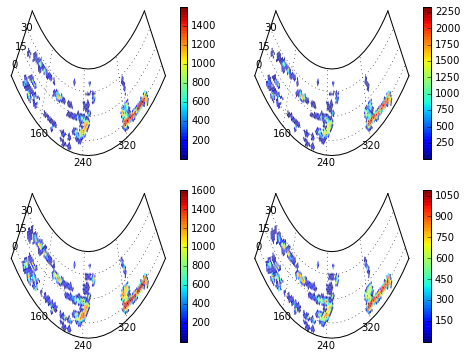

In [307]:
figure(figsize=(8, 6))
ax = subplot(221, projection='aea')
number_density(ax, ELGR)
colorbar()
ax = subplot(222, projection='aea')
number_density(ax, ELG)
colorbar()
ax = subplot(223, projection='aea')
number_density(ax, CDR_ELGR)
colorbar()
ax = subplot(224, projection='aea')
number_density(ax, CDR_ELG)
colorbar()

# This Section compares with Martin's correlation function
# This also shows for LRG the star veto is not doing much

In [144]:
RAd, DECd = loadtxt('/global/homes/y/yfeng1/source/imaginglss/nersc/ForYu/LRG_d.rdz', usecols=(0,1), unpack=True)

In [145]:
RAr, DECr = loadtxt('/global/homes/y/yfeng1/source/imaginglss/nersc/ForYu/LRG_r.rdz', usecols=(0,1), unpack=True)

In [146]:
data = sphere.points(RAd, DECd)
random = sphere.points(RAr, DECr)
abin = sphere.AngularBinning(logspace(-3, 0, 16, endpoint=True))
print len(data), len(random)

DD = correlate.paircount(data, data, abin, np=8)
DR = correlate.paircount(data, random, abin, np=8)
RR = correlate.paircount(random, random, abin, np=8)

572573 1793492


In [153]:
!cat /global/homes/y/yfeng1/source/imaginglss/nersc/ForYu/LRG.wt

# MPI w(theta)-LS code running on 32 processes.
# Read    1793492 objects in 0.000<z<9.000 from LRG_r.rdz
# Read     572573 objects in 0.000<z<9.000 from LRG_d.rdz
# Read     572573 objects in 0.000<z<9.000 from LRG_d.rdz
# Reading and partitioning took 8.13 sec.
# Raw random load: [54496,57598].
# Raw random total count: 1793492
# Will count RR with random stride 1
# Using 32 pixels for bootstrap.
# Pixelizing took 0.26 sec.
# Using 32 pixels (528 pairs).
# After padding random load: [64327,98967].
# Tree has 225008 nodes.
# Memory load is 32.62 MB (excluding lists).
# Longest list length is 83
# Occurs for node of size 0.00
# Total cumulative list length is 361801
# Minimum node size is 1.12e-06 (min_node_size=1.00e-05).
# Pair calculation took 40.28 sec.
# Total run time 48.45 sec.
#  th(deg)          w(th)            Avg            Std
    0.0059        1.72780        1.71128        0.09555
    0.0082        1.14968        1.13562        0.09227
    0.0114        0.83225        0.8

[]

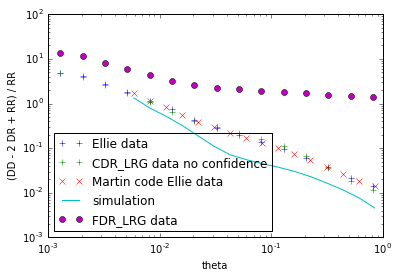

In [235]:
r = 1.0 * len(data) / len(random)
plot(abin.angular_centers, 
     (1.0 * DD.sum1 - 2 * r * DR.sum1 + r ** 2 * RR.sum1) / (r ** 2 * RR.sum1), 
     '+',
     label='Ellie data')
plot(abin.angular_centers, 
     (CDR_LRG_DD - 2 * CDR_LRG_DR + CDR_LRG_RR) / CDR_LRG_RR, 
     '+',
     label='CDR_LRG data no confidence', 
     )
r, w = loadtxt('/global/homes/y/yfeng1/source/imaginglss/nersc/ForYu/LRG.wt', usecols=(0, 1), unpack=True)

plot(r, w, 'x', label='Martin code Ellie data')
plot(xi_LRGsim[0], xi_LRGsim[1], label='simulation')

plot(abin.angular_centers, (LRG_DD - 2 * LRG_DR + LRG_RR) / LRG_RR, 'o', label='FDR_LRG data')
xlabel('theta')
ylabel('(DD - 2 DR + RR) / RR')
legend(loc='lower left')
loglog()

572573


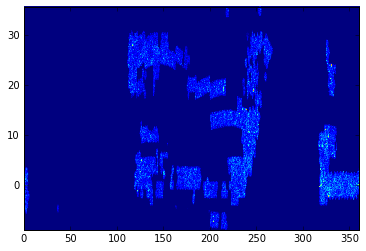

In [183]:
_ = hist2d(RAd, DECd, bins=(400, 400))
print len(RAd)

539217


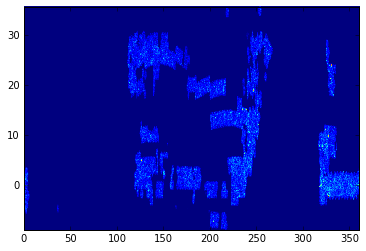

In [188]:
RA_CDR_LRGd, DEC_CDR_LRGd = readdata(CDR_LRG, 1, 1)
print len(RA_CDR_LRGd)
_ = hist2d(RA_CDR_LRGd, DEC_CDR_LRGd, bins=(400, 400))

2948485


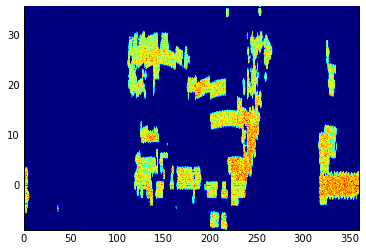

In [187]:
RA_CDR_LRGr, DEC_CDR_LRGr = readdata(CDR_LRGR, 1, 1)
print len(RA_CDR_LRGr)
_ = hist2d(RA_CDR_LRGr, DEC_CDR_LRGr, bins=(400, 400))

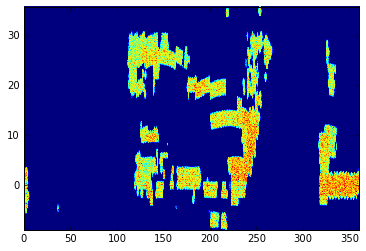

In [175]:
_ = hist2d(RAr, DECr, bins=(400, 400))